In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [55]:
df = pd.read_csv("../bodyPerformance.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


### 2. Encode categorical variables

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

# df['gender'] = df['gender'].map({'M': 1, 'F': 0})
# class_map = {'A': 3, 'B': 2, 'C': 1, 'D': 0}
# df['class'] = df['class'].map(class_map)
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


inspect unique classes

In [57]:
print(df['class'].unique())

['C' 'A' 'B' 'D']


In [58]:
# Clean up class column: remove spaces, make uppercase
df['class'] = df['class'].astype(str).str.strip().str.upper()

# Check unique values to verify
print("Unique class values after cleaning:", df['class'].unique())

class_map = {'A': 3, 'B': 2, 'C': 1, 'D': 0}
df['class'] = df['class'].map(class_map)
df


Unique class values after cleaning: ['C' 'A' 'B' 'D']


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,1
13389,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,0
13390,39.0,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,3
13391,64.0,0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,0


### 3. Define features and target

In [59]:
features = [col for col in df.columns if col != 'class']
X = df[features]
y = df['class']

### 4. Split into train (60%), temp (40%)

In [60]:

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

# 5. Split temp into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

### 6. Normilize features (fit only on train, apply to all)

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### 7. Convert back to DF for convenience

In [62]:
X_train_scaled = pd.DataFrame(
    X_train_scaled, columns=features, index=X_train.index)
X_val_scaled = pd.DataFrame(
    X_val_scaled,   columns=features, index=X_val.index)
X_test_scaled = pd.DataFrame(
    X_test_scaled,  columns=features, index=X_test.index)

### 8. SHow split sizes and class distribution

In [63]:
print("Train set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)
print("\nClass distribution in train set:\n",
      y_train.value_counts(normalize=True))
print("\nClass distribution in validation set:\n",
      y_val.value_counts(normalize=True))
print("\nClass distribution in test set:\n",
      y_test.value_counts(normalize=True))

Train set size: (8035, 11)
Validation set size: (2679, 11)
Test set size: (2679, 11)

Class distribution in train set:
 class
0    0.250031
3    0.250031
1    0.250031
2    0.249907
Name: proportion, dtype: float64

Class distribution in validation set:
 class
3    0.250093
1    0.250093
0    0.250093
2    0.249720
Name: proportion, dtype: float64

Class distribution in test set:
 class
2    0.250093
1    0.250093
0    0.250093
3    0.249720
Name: proportion, dtype: float64


In [64]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


In [65]:
X = df.drop('class', axis=1)
y = df['class']
X.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0


# Model Definition

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
models = {
    'kNN': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

### # Hyperparameter Grids (for tuning)

In [68]:

param_grids = {
    'kNN': {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]},
    'Decision Tree': {'max_depth': [3, 5, 7, 9]},
    'SVM (Linear)': {'C': [0.1, 1, 10]},
    'SVM (RBF)': {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1, 1]},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [5, 10, None]}
}

### Training, tuning and Validation


Training kNN...
Best params for kNN: {'n_neighbors': 13}
Validation Accuracy: 0.624
              precision    recall  f1-score   support

           0       0.89      0.67      0.77       670
           1       0.56      0.57      0.57       670
           2       0.47      0.47      0.47       669
           3       0.63      0.79      0.70       670

    accuracy                           0.62      2679
   macro avg       0.64      0.62      0.63      2679
weighted avg       0.64      0.62      0.63      2679



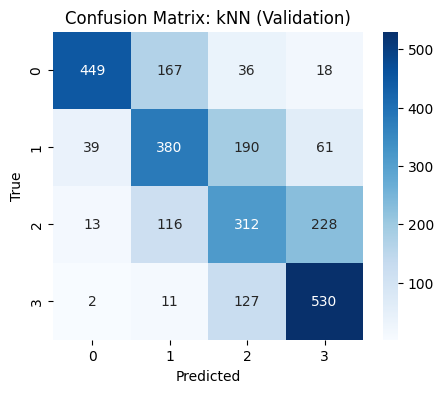


Training LDA...
Validation Accuracy: 0.610
              precision    recall  f1-score   support

           0       0.83      0.73      0.77       670
           1       0.53      0.56      0.54       670
           2       0.44      0.44      0.44       669
           3       0.67      0.71      0.69       670

    accuracy                           0.61      2679
   macro avg       0.62      0.61      0.61      2679
weighted avg       0.62      0.61      0.61      2679



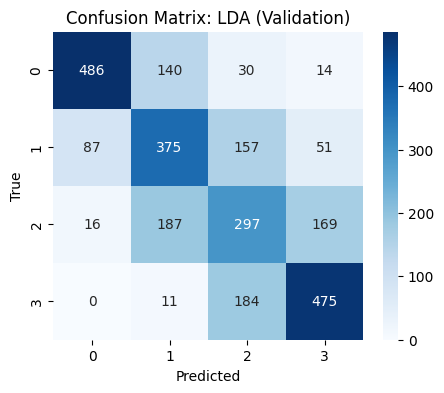


Training QDA...
Validation Accuracy: 0.638
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       670
           1       0.56      0.61      0.58       670
           2       0.48      0.47      0.47       669
           3       0.68      0.75      0.71       670

    accuracy                           0.64      2679
   macro avg       0.65      0.64      0.64      2679
weighted avg       0.65      0.64      0.64      2679



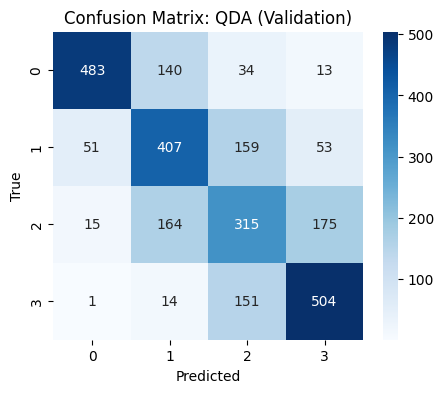


Training Naive Bayes...
Validation Accuracy: 0.531
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       670
           1       0.47      0.48      0.48       670
           2       0.37      0.21      0.27       669
           3       0.56      0.75      0.64       670

    accuracy                           0.53      2679
   macro avg       0.51      0.53      0.51      2679
weighted avg       0.51      0.53      0.51      2679



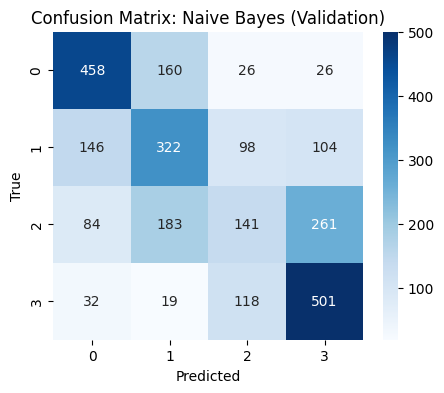


Training Decision Tree...
Best params for Decision Tree: {'max_depth': 9}
Validation Accuracy: 0.644
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       670
           1       0.63      0.49      0.55       670
           2       0.49      0.56      0.52       669
           3       0.64      0.79      0.71       670

    accuracy                           0.64      2679
   macro avg       0.66      0.64      0.64      2679
weighted avg       0.66      0.64      0.65      2679



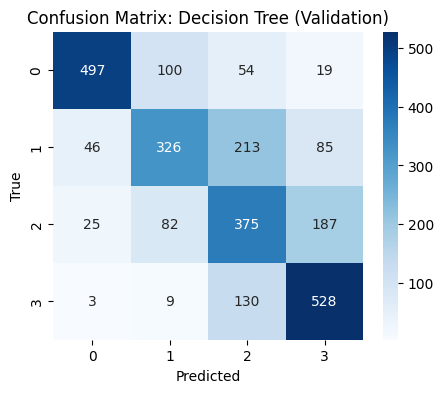


Training SVM (Linear)...
Best params for SVM (Linear): {'C': 0.1}
Validation Accuracy: 0.614
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       670
           1       0.54      0.51      0.52       670
           2       0.45      0.47      0.46       669
           3       0.67      0.75      0.71       670

    accuracy                           0.61      2679
   macro avg       0.62      0.61      0.61      2679
weighted avg       0.62      0.61      0.61      2679



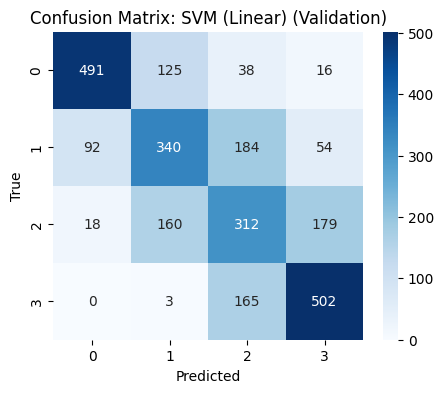


Training SVM (RBF)...
Best params for SVM (RBF): {'C': 10, 'gamma': 0.1}
Validation Accuracy: 0.694
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       670
           1       0.66      0.63      0.65       670
           2       0.56      0.55      0.55       669
           3       0.69      0.81      0.75       670

    accuracy                           0.69      2679
   macro avg       0.70      0.69      0.69      2679
weighted avg       0.70      0.69      0.69      2679



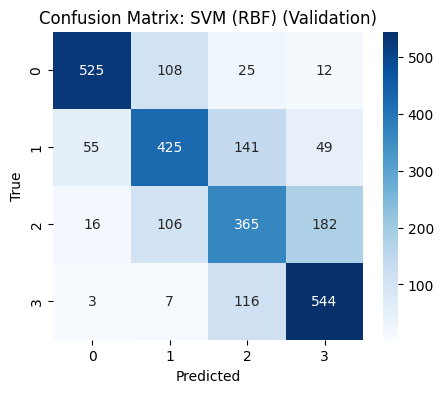


Training Random Forest...
Best params for Random Forest: {'max_depth': None, 'n_estimators': 100}
Validation Accuracy: 0.730
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       670
           1       0.70      0.67      0.69       670
           2       0.61      0.59      0.60       669
           3       0.71      0.85      0.77       670

    accuracy                           0.73      2679
   macro avg       0.73      0.73      0.73      2679
weighted avg       0.73      0.73      0.73      2679



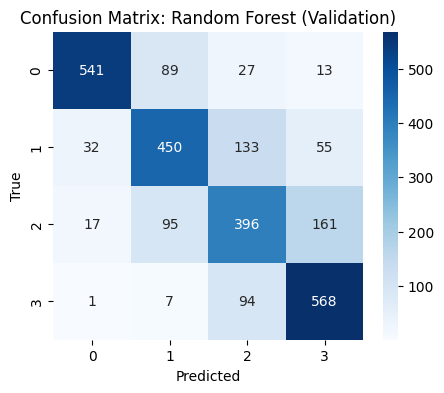

In [69]:

results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    if name in param_grids:
        grid = GridSearchCV(model, param_grids[name], cv=3, n_jobs=-1)
        grid.fit(X_train_scaled, y_train)
        best_model = grid.best_estimator_
        print(f"Best params for {name}: {grid.best_params_}")
    else:
        best_model = model.fit(X_train_scaled, y_train)
    y_pred_val = best_model.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred_val)
    print(f"Validation Accuracy: {acc:.3f}")
    print(classification_report(y_val, y_pred_val))
    cm = confusion_matrix(y_val, y_pred_val)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name} (Validation)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    # Store for test evaluation
    results[name] = best_model

### Final Test and Validation


--- Final Test Set Results (Random Forest) ---
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       670
           1       0.71      0.65      0.68       670
           2       0.60      0.59      0.60       670
           3       0.71      0.84      0.77       669

    accuracy                           0.73      2679
   macro avg       0.73      0.73      0.72      2679
weighted avg       0.73      0.73      0.72      2679



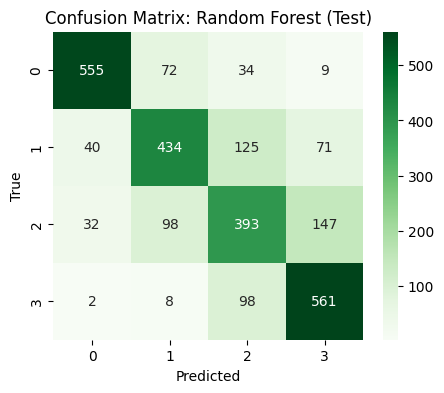

In [70]:
# --- Final Test Set Evaluation (Best Model Example: Random Forest) ---
best_model = results['Random Forest']
y_pred_test = best_model.predict(X_test_scaled)
print("\n--- Final Test Set Results (Random Forest) ---")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: Random Forest (Test)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()